 load tweets from file and select tweet feutures

In [ ]:
import pandas as pd
tweets_df = pd.read_pickle("tweets10t.pkl")

tweets_df.keys()
tweets_filtered = tweets_df.copy() 
column_list = ["id","author_id","created_at", "text","entities", "lang",'public_metrics','context_annotations']
tweets_filtered = tweets_filtered[column_list]






create graph using pair(hashtags , mentions) and sort by most frequents 

In [ ]:
from collections import Counter
edges=[]

for index,row in tweets_filtered.iterrows():
    try:

        for tag in row['entities']['hashtags']:
            for men in row['entities']['mentions']:
                edges.append(str(men['username']).lower()+','+str(tag['tag']).lower())    
    except:
        pass
freq_edges=Counter(edges).most_common()

import numpy as np
freq_tag=np.array(freq_edges)[:1000]


store graph in csv file

In [ ]:
import csv
f=open("men_edges.csv",'a')
wf=csv.writer(f)
for row in  freq_tag:
    m,t=row[0].split(',')
    
    wf.writerow((('@'+m),t,row[1]))#,row['context_annotations'][0]['entity']['name']])
    
    
f.close()

calling tools for working on graph

In [1]:
import itertools
import networkx as nx
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math

load pairs from file and create graph using igraph tools

In [99]:
data = nx.read_weighted_edgelist("men_edges.csv",delimiter=",")
g = ig.Graph.from_networkx(data)

show up any nodes and egdes weight

In [100]:
for vertice in g.vs:
    print(vertice.attributes())
for edge in g.es:
    print(edge.attributes())

{'_nx_name': '@nickypromotes'}
{'_nx_name': 'crypto'}
{'_nx_name': 'nft'}
{'_nx_name': 'nftcommunity'}
{'_nx_name': 'nftgiveaways'}
{'_nx_name': 'p2e'}
{'_nx_name': 'defi'}
{'_nx_name': 'gamefi'}
{'_nx_name': '@visiitapp'}
{'_nx_name': 'siit'}
{'_nx_name': '@nftcryptoetsy'}
{'_nx_name': 'giveaway'}
{'_nx_name': 'cryptocurrency'}
{'_nx_name': '@openai'}
{'_nx_name': 'chatgpt'}
{'_nx_name': '@datachaz'}
{'_nx_name': '@digitaloneesan'}
{'_nx_name': 'aiart'}
{'_nx_name': 'stablediffusion'}
{'_nx_name': 'ai'}
{'_nx_name': 'aiイラスト'}
{'_nx_name': '美女'}
{'_nx_name': '美少女'}
{'_nx_name': 'aiグラビア'}
{'_nx_name': '@savetonotion'}
{'_nx_name': '@enricomolinari'}
{'_nx_name': 'marketing'}
{'_nx_name': 'finserv'}
{'_nx_name': 'thread'}
{'_nx_name': 'fintech'}
{'_nx_name': 'metaverse'}
{'_nx_name': '@mdancho84'}
{'_nx_name': '@youtube'}
{'_nx_name': '@emadciler'}
{'_nx_name': 'floki'}
{'_nx_name': 'web3'}
{'_nx_name': 'salı'}
{'_nx_name': '@elonmusk'}
{'_nx_name': '@tprstly'}
{'_nx_name': 'bone'}
{'_nx

get  graph size,graph order

In [101]:
nodes = g.vs()
edges = g.es()

print("Graph order:", len(nodes))

# GRAPH SIZE = NO OF EDGES

print("Graph size:", len(edges))

Graph order: 589
Graph size: 1000


using needed function to analyze graph based on steps in doc

In [102]:
indeg=g.indegree()

In [103]:
outdeg=g.outdegree()

In [104]:
pr=g.pagerank(directed=False)

In [105]:
comp=g.components()
print(len(comp)) #get number of batch components

15


plotting nodes distribution in components

<BarContainer object of 15 artists>

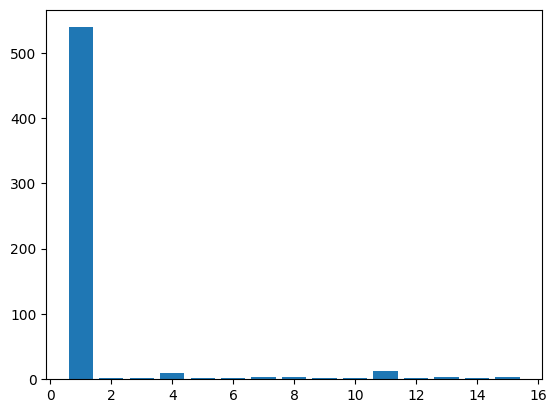

In [106]:
import matplotlib.pyplot as plt
plt.bar(range(1,16),comp.sizes())

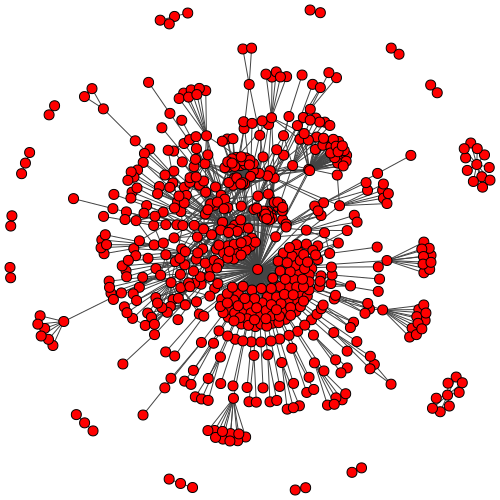

In [108]:
colors = ig.drawing.colors.known_colors
colors = list(colors.keys())
#set label to be names of nx graph nodes
#g.vs["label"] = g.vs["_nx_name"]

visual_style = {}
#node size
visual_style["vertex_size"] = 10
#node color
visual_style["vertex_label"] =None
visual_style["bbox"] = (500, 500)
#margin
visual_style["margin"] = 10

ig.plot(g, **visual_style,layout="fr")

selecting nodes from biggest component

In [110]:
maxindex=comp.sizes().index(max(comp.sizes()))
large_comp=comp[maxindex]

In [111]:
for n in large_comp:
    print(g.vs[n]['_nx_name'])

@nickypromotes
crypto
nft
nftcommunity
nftgiveaways
p2e
defi
gamefi
@nftcryptoetsy
giveaway
cryptocurrency
@openai
chatgpt
@datachaz
@digitaloneesan
aiart
stablediffusion
ai
aiイラスト
美女
美少女
aiグラビア
@savetonotion
@enricomolinari
marketing
finserv
thread
fintech
metaverse
@mdancho84
@youtube
@emadciler
floki
web3
salı
@elonmusk
@tprstly
bone
@ykdojo
@hadaskotek
@machinemindsai
@khulood_almani
@utopiap2p
@chatgpt
@aitechio
banking
@comingchatapp
@ipfconline1
@google
@aiartgen001
@zumruduanka_x
@hackinarticles
infosec
cybersecurity
cybersecuritytips
pentesting
redteam
informationsecurity
cybersec
@datasciencedojo
@python_dv
python
generativeai
datascience
machinelearning
@frronconi
@sinjowkazma
@jblefevre60
@eossupportcn
eossupport
btc
人工智能
fet
robots
@shi4tech
payments
govtech
@yorkieinu_bsc
memecoin
gpt
art
news
yorkie
@cyberconnecthq
openai
tweet
@rainmakergaming
nfts
nftcollection
nftgame
nftnews
@hasaki_inu
hasaki
@bitmartexchange
@avatago_info
avatago
@coconut_bobb
物語工学
@nicochan33
@gui

sorting nodes based on values of pagerank, indegree, outdegree 

In [112]:
top_pr=sorted(range(len(pr)), key=lambda i: pr[i])[-22:] 

In [114]:
top_indr=sorted(range(len(indeg)), key=lambda i: indeg[i])[-22:]

In [115]:
top_outdr=sorted(range(len(outdeg)), key=lambda i: outdeg[i])[-22:]

In [116]:
top_dr=sorted(range(len(g.degree())), key=lambda i: g.degree()[i])[-22:]

select importent nodes

In [117]:
import_nodes=[]
for i in top_pr:
    if i in top_dr:
        import_nodes.append(g.vs[i]['_nx_name'])

split nodes to tags and mentions

In [118]:
tag,men=[],[]
for i in import_nodes:
    if i[0]=='@':
        men.append(i)
    else:
        tag.append(i)

set weight between nodes based on frequents 

In [119]:
graph=[]
for m in men:
    for t in tag:
        try:
            w=(m,t,data.get_edge_data(m,t)['weight'])
            if w!=None:
                graph.append(w)
        except:
            pass

store subgraph pair(tag,mention,weight) into file

In [120]:
import csv
f=open("root.csv",'a')
for row in  graph:
    l,t=row[0],row[1]
    wf=csv.writer(f)
    wf.writerow((t,l,row[2]))
    
f.close()

load subgraph file and generate a graph

In [121]:
data = nx.read_weighted_edgelist("root.csv",delimiter=",")
g = ig.Graph.from_networkx(data)

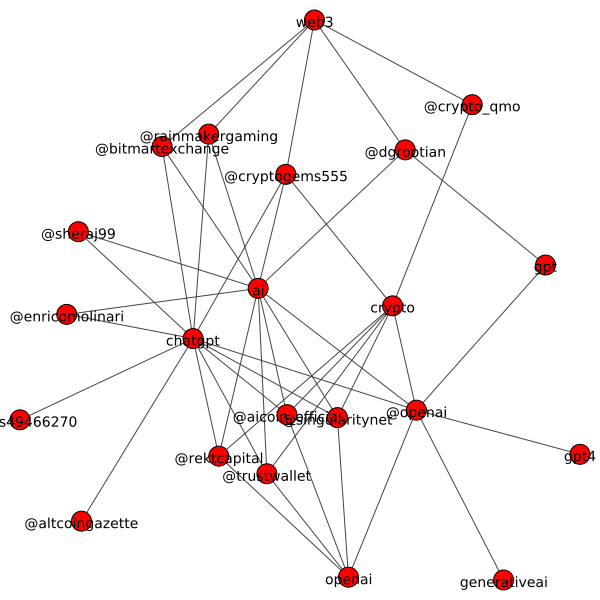

In [122]:
ig.plot(g,vertex_label=g.vs['_nx_name'])

clustering nodes using modularity

In [123]:
modul=g.community_optimal_modularity()

get hub and authority_score score for all of nodes

In [124]:
for s in range(len(g.hub_score())):
    print(g.hub_score()[s],g.vs[s]['_nx_name'])
    


0.0 crypto
0.28120925659902435 @crypto_qmo
0.0 openai
0.8865843134709123 @aicoin_official
0.0 ai
0.0 chatgpt
0.8865843134709123 @singularitynet
0.8865843134709123 @rektcapital
0.8865843134709123 @trustwallet
0.5473967333619691 @enricomolinari
0.8286059899609938 @cryptogems555
0.4114526817914733 @dgrootian
1.0 @openai
0.27603584621207555 @altcoingazette
0.27603584621207555 @mos49466270
0.640563980064447 @bitmartexchange
0.640563980064447 @rainmakergaming
0.5473967333619691 @sheraj99
0.0 web3
0.0 gpt
0.0 gpt4
0.0 generativeai


In [125]:

for s in range(len(g.authority_score())):
    print(g.authority_score()[s],g.vs[s]['_nx_name'])

0.6812231544452236 crypto
0.0 @crypto_qmo
0.547557762104102 openai
0.0 @aicoin_official
0.983063942142535 ai
1.0 chatgpt
0.0 @singularitynet
0.0 @rektcapital
0.0 @trustwallet
0.0 @enricomolinari
0.0 @cryptogems555
0.0 @dgrootian
0.0 @openai
0.0 @altcoingazette
0.0 @mos49466270
0.0 @bitmartexchange
0.0 @rainmakergaming
0.0 @sheraj99
0.3375186519467408 web3
0.16999439957899595 gpt
0.12043931884647535 gpt4
0.12043931884647535 generativeai


checking connected all nodes  to gether 

In [126]:
print(g.is_connected())
print(g.components())

True
Clustering with 22 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21


set score to any mentions 

In [127]:
page_score=g.hub_score()   


set score to any tags using 2 degrees equation


In [128]:
size_v=[33*(s**2) for s in g.authority_score()]

In [129]:
print(size_v)

[15.314144543025934, 0.0, 9.89404359373493, 0.0, 31.891685573247106, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.75932173359419, 0.9536371643113702, 0.47868577429869746, 0.47868577429869746]


find high value cluster thet included target nodes

In [130]:
for c in g.community_optimal_modularity():
    if page_score.index(max(page_score)) in c:
        print(g.vs[c]['_nx_name'])

['@openai', 'gpt', 'gpt4', 'generativeai']
